# Распределение хи-квадрат

### Плотность вероятности:

$$\displaystyle Y ={\frac {(1/2)^{k/2}}{\Gamma (k/2)}}x^{k/2-1}e^{-x/2}$$

### Мат. ожидание:

$$ \mathbb {E} [Y]=k $$

### Дисперсия:

$$ {\displaystyle \mathrm {D} [Y]=2k} $$

## Импортирование библиотек

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats as sts
import numpy as np
import pandas as pd

import math

## Функции подсчета мат. ожидания и дисперсии из выборки

In [5]:
def E(x):
    return sum(x) / len(x)


def D(x):
    return E(x ** 2 - (E(x)) ** 2)    

## Формирование 1000 выборочных независимых случайных величин

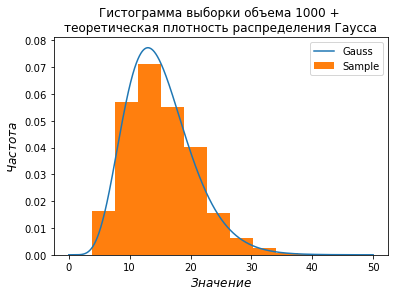

In [13]:
x = np.linspace(0, 50, 1000);
# Инициализация мат. ожидания распределения для всех дальнейших исследований
k = 15

chi2_rv = sts.chi2(k)
# Формирование выборки из 1000 случайных величин
sample = chi2_rv.rvs(1000)
# Формирование функции плотности распределения хи-квадрат
chi2_pdf = chi2_rv.pdf(x)

plt.plot(x, chi2_pdf, label='Gauss')
plt.hist(sample, density=True,label='Sample')
plt.title('Гистограмма выборки объема 1000 + \nтеоретическая плотность распределения Гаусса')
plt.xlabel('$Значение$', fontsize=12)
plt.ylabel('$Частота$', fontsize=12)
plt.legend();

## Формирование 1000 выборок с объемами n

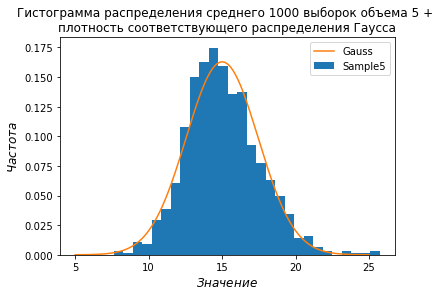

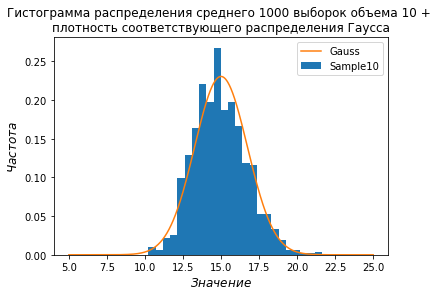

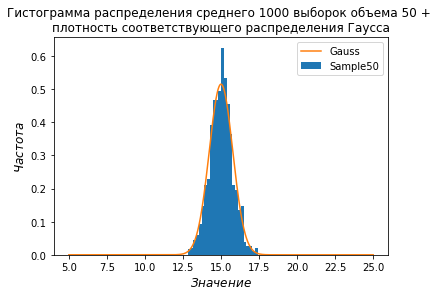

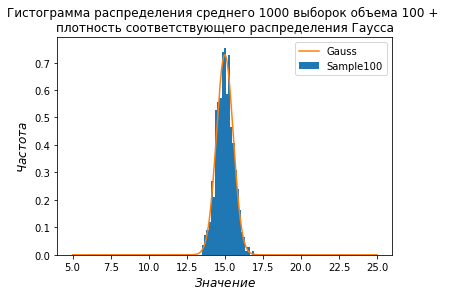

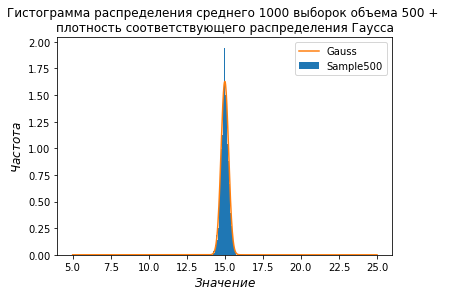

In [12]:
x = np.linspace(5, 25, 1000);

#Кортеж всех объемов n
choice = (5, 10, 50, 100,500)


# Инициализация таблицы, по которой мы будем делать выводы
frame = pd.DataFrame(columns=['Объем выборок',
                              'Мат. ожидание',
                              'Абс. откл. мат. ожидания',
                              'Отн. откл. мат. ожидания %',
                              'Дисперсия',
                              'Абс. откл. дисперсии',
                              'Отн. откл. дисперсии %'
                             ]
                    )

for n in choice:
    # Инициализация массива со средними значениями в каждой выборке
    sample_means = np.empty((1,0), float)
    
    # Инициализация нормального распределения с мат. ожиданием k и дисперсией 2k/n
    norm_rv = sts.norm(k,math.sqrt(2*k/n))
    # Формирование функции плотности нормального распределения
    norm_pdf = norm_rv.pdf(x)
    
    for sample_number in range(1000):
        chi2_rv = sts.chi2(k)
        sample = chi2_rv.rvs(n)
        sample_means = np.append(sample_means,E(sample))
        
    plt.hist(sample_means,density = True, bins='auto', label='Sample'+str(n))
    plt.plot(x,norm_pdf, label='Gauss')
    plt.title('Гистограмма распределения среднего 1000 выборок объема {} + '
          '\nплотность соответствующего распределения Гаусса'.format(n))
    plt.xlabel('$Значение$', fontsize=12)
    plt.ylabel('$Частота$', fontsize=12)
    plt.legend()
    plt.show()
    
    # Внесение данных для дальнейшей оценки распределения выборочного среднего случайной величины при разных объёмах выборок
    frame = frame.append({'Объем выборок': n,
                          'Мат. ожидание': E(sample_means),
                          'Абс. откл. мат. ожидания': E(sample_means) - k,
                          'Отн. откл. мат. ожидания %': 100 - (100*E(sample_means)/k),
                          'Дисперсия': D(sample_means),
                          'Абс. откл. дисперсии': D(sample_means) - 2*k/n,
                          'Отн. откл. дисперсии %': 100 - (100*D(sample_means)/(2*k/n)),
                         }, ignore_index=True
                        );
    

## Выводы

In [17]:
frame

,Объем выборок,Мат. ожидание,Абс. откл. мат. ожидания,Отн. откл. мат. ожидания %,Дисперсия,Абс. откл. дисперсии,Отн. откл. дисперсии %
0,5.0,15.030435,0.030435,-0.202902,6.216175,0.216175,-3.602920
1,10.0,14.957510,-0.042490,0.283265,3.002410,0.002410,-0.080329
2,50.0,15.022518,0.022518,-0.150123,0.560268,-0.039732,6.622044
3,100.0,15.002778,0.002778,-0.018519,0.309106,0.009106,-3.035413
4,500.0,15.003001,0.003001,-0.020007,0.058151,-0.001849,3.080868


Судя по вышеприведенной таблице, с ростом n значение математического ожидания лучше приближается к теоретическому.
В то же время абсолютное отклонение дисперсии относительно теоретических значений с ростом n уменьшается.